In [1]:
import tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

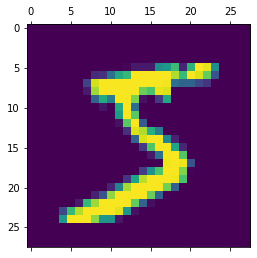

In [8]:
plt.matshow(X_train[0])

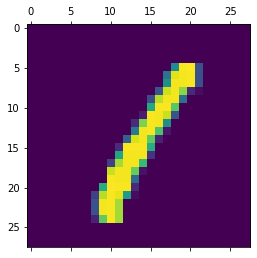

In [9]:
plt.matshow(X_train[3])

In [10]:
y_train[3]

1

In [11]:
y_train[0]

5

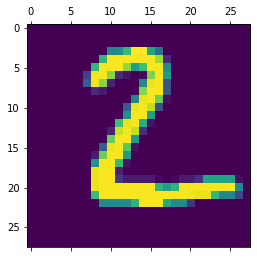

In [13]:
plt.matshow(X_test[1])

In [14]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [26]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
X_train_flattened.shape

(60000, 784)

In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [30]:
X_test_flattened.shape

(10000, 784)

In [31]:
model = keras.Sequential([keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')])


In [32]:
model.compile(optimizer = 'adam',loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [33]:
model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4711 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9251


In [35]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.9252


[0.2682133913040161, 0.9251999855041504]

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.7160406e-02, 2.8555274e-07, 7.6065272e-02, 9.6835065e-01,
       1.9883811e-03, 1.2061143e-01, 2.5087184e-06, 9.9974936e-01,
       6.9790810e-02, 6.1350405e-01], dtype=float32)

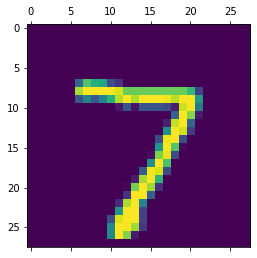

In [37]:
plt.matshow(X_test[0])

#### np.argmax finds a maximum element from an array and returns the index of it



In [38]:
np.argmax(y_predicted[0])

7

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [40]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1120,    2,    2,    0,    1,    4,    2,    4,    0],
       [   5,   11,  927,   17,    9,    4,   12,    8,   36,    3],
       [   4,    0,   20,  929,    0,   21,    2,   10,   17,    7],
       [   1,    2,    2,    3,  922,    0,   12,    4,    9,   27],
       [  10,    5,    5,   41,   10,  772,   12,    7,   26,    4],
       [  11,    3,    7,    1,    7,   16,  909,    2,    2,    0],
       [   1,    7,   22,    8,    9,    0,    0,  954,    1,   26],
       [   9,   15,    6,   28,    9,   32,    8,   12,  849,    6],
       [  10,    7,    2,   15,   35,    7,    0,   23,    5,  905]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

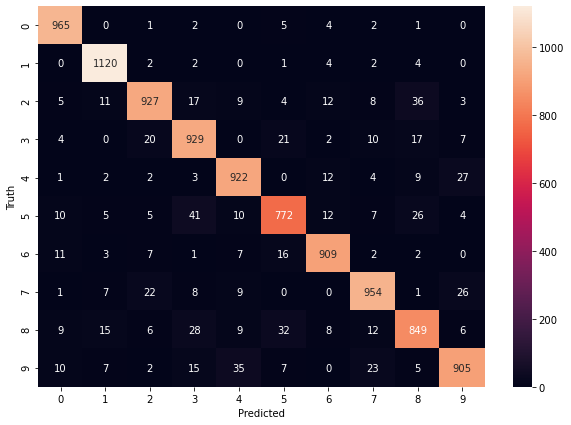

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [43]:
model = keras.Sequential([keras.layers.Dense(100, input_shape = (784,) , activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')])

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.fit(X_train_flattened, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2722 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1237 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9843


In [44]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9749


[0.08369143307209015, 0.9749000072479248]

Text(69.0, 0.5, 'Truth')

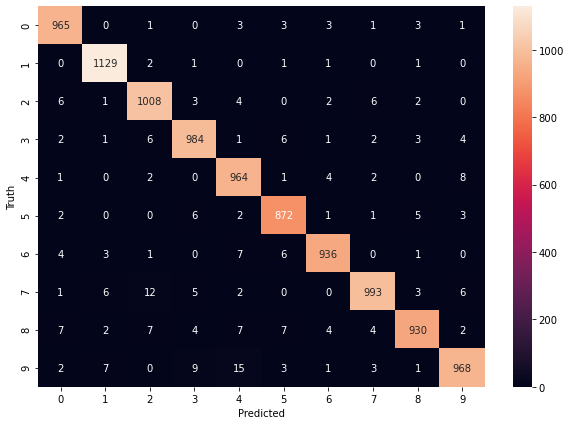

In [45]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset


In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2745 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1243 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0403 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.017

In [47]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9782


[0.07694341242313385, 0.9782000184059143]